In [47]:
from IPython.display import display, HTML
import pandas as pd

# Define the CSS that will make the table scrollable
css = """
.output {
    max-height: 500px; /* Adjust as needed */
    overflow: scroll;  /* Allows scrolling */
}
"""

# Apply the CSS for scrollable output
display(HTML('<style>{}</style>'.format(css)))

# Configure pandas display options for better visuals
pd.set_option('display.max_rows', None)  # Display all rows, adjust as needed
pd.set_option('display.max_columns', None)  # Display all columns, adjust as needed
pd.set_option('display.max_colwidth', 90)  # Set max column width for long text
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers


In [49]:

import pandas as pd
import configparser

# initiate the config parser
config = configparser.ConfigParser()

# read the config ini file
config.read('config.ini')

# access the file path 
csv_file_path = config['path']['data_salaries']

In [50]:
# Load the dataset
df = pd.read_csv(csv_file_path, encoding='UTF-8-SIG')

# Remove any whitespaces from 'job_title'
df['job_title']=df['job_title'].str.strip() 

print(f"Data market salaries for 2024 table shape: {df.shape}")

Data market salaries for 2024 table shape: (14838, 11)


In [51]:
# Display distinct row count for each column in an HTML table
distinct_counts = df.nunique()
distinct_counts_html = f"<div><b>Distinct row count for each column:</b></div>{distinct_counts.to_frame().to_html()}"
display(HTML(distinct_counts_html))

,0
work_year,5
experience_level,4
employment_type,4
job_title,153
salary,2363
salary_currency,23
salary_in_usd,2730
employee_residence,88
remote_ratio,3
company_location,77


In [52]:

# Group by job title and find the maximum salary
salary_by_title = df.groupby('job_title')['salary_in_usd'].max().reset_index()

# Sort the DataFrame by salary in descending order
salary_by_title_sorted = salary_by_title.sort_values(by='salary_in_usd', ascending=False)

# Create the HTML table
distinct_counts_html = f"<div><b>Distinct job titles sorted by highest salary:</b></div>{salary_by_title_sorted.to_html(index=False)}"
display(HTML(distinct_counts_html))

job_title,salary_in_usd
AI Architect,800000
Data Analyst,774000
Analytics Engineer,750000
Data Scientist,750000
Data Engineer,750000
Machine Learning Scientist,750000
Machine Learning Engineer,750000
Research Scientist,720000
Research Engineer,720000
Prompt Engineer,600000


In [53]:
import pandas as pd
from IPython.display import display, HTML

# Step 1: Get the top 5 job titles based on salary
top_5_titles = df.groupby('job_title')['salary_in_usd'].max().nlargest(5).index.tolist()

# Step 2: Filter the DataFrame for the selected job titles and calculate total salary
filtered_df = df[df['job_title'].isin(top_5_titles)]
salary_totals = filtered_df.groupby('job_title')['salary_in_usd'].sum()

# Step 3: Rank the job titles by total salary
ranked_titles = salary_totals.rank(method='first', ascending=False).astype(int).sort_values()

# Step 4: Create a DataFrame for displaying in HTML format
ranked_df = pd.DataFrame({
    "Rank": ranked_titles,
    "Job Title": ranked_titles.index,
    "Total Salary": salary_totals
}).sort_values("Rank")

# Step 5: Display as an HTML table
html_table = ranked_df.to_html(index=False, justify="center", border=1)
display(HTML(html_table))

Rank,Job Title,Total Salary
1,AI Architect,464852130
2,Analytics Engineer,464118911
3,Data Analyst,236481586
4,Data Engineer,64325408
5,Data Scientist,7143986


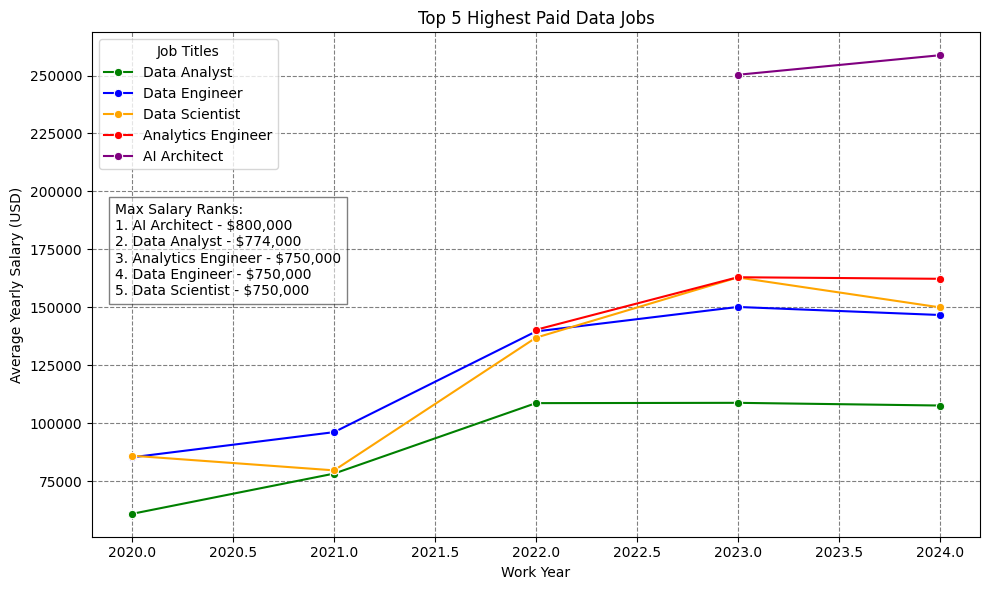

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the top 5 job titles based on maximum salary
top_5_titles = df.groupby('job_title')['salary_in_usd'].max().nlargest(5).index.tolist()

# Step 2: Filter the DataFrame for the selected job titles
filtered_df = df[df['job_title'].isin(top_5_titles)]

# Step 3: Group by work_year and job_title, and aggregate the salary
grouped_df = filtered_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

# Calculate the maximum salary for each job title and rank them
max_salaries = filtered_df.groupby('job_title')['salary_in_usd'].max()
ranked_titles = max_salaries.rank(method='first', ascending=False).astype(int).sort_values()

# Step 4: Define a color palette for each job title for consistent coloring
custom_palette = {
    "Data Engineer": "blue",
    "Data Scientist": "orange",
    "AI Architect": "purple",
    "Analytics Engineer": "red",
    "Data Analyst": "green"
}

# Create the Seaborn line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='work_year', y='salary_in_usd', hue='job_title', marker='o', palette=custom_palette)

# Customize the main legend for job titles only
plt.legend(title='Job Titles')

# Display rank by maximum salary as a separate text box
rank_text = "\n".join([f"{ranked_titles[job]}. {job} - ${max_salaries[job]:,.0f}" for job in ranked_titles.index])
plt.gcf().text(0.12,0.5, f"Max Salary Ranks:\n{rank_text}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Add grid, labels, and data source reference
plt.title('Top 5 Highest Paid Data Jobs')
plt.xlabel('Work Year')
plt.ylabel('Average Yearly Salary (USD)')
plt.grid(True, color='gray', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()